In [89]:
#import modules necessary
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [90]:
#function of the perceptron algorithm
class Perceptron():
    # initialize
    def __init__(self) -> None:
        self.X = None
        self.variables = None
        self.y = None
        self.predictor = None
        self.n = None
        self.p = None
        self.bias = None
        self.gamma = None
        self.max_iter = None
        self.eta = None

        self.weights = None
        self.weights_history = []
        self.loss_history = [np.inf]

    def sign(self, x, y):
        if x@y>0:
            return 1
        else:
            return -1
        
    def loss(self):
        return sum(0.5*(self.sign(self.weights, x) - self.y[i])**2 for i, x in enumerate(self.X))

    def grad_approx(self, x, y):
        return (self.sign(self.weights, x) - y) * x

    def update_w(self, id):
        self.weights = self.weights - self.gamma * self.grad_approx(self.X[id], self.y[id])
        self.weights_history.append(self.weights)
        return 

    # model fitting
    def fit(self, X, y, bias=True, gamma=0.01, max_iter=100, eta=0.001):
        self.variables = X.columns
        self.predictor = y.name
        
        X = X.to_numpy()
        y = y.to_numpy()
        if bias:
            ones_column = np.ones((X.shape[0], 1))
            X = np.append(ones_column, X, axis=1)
        self.X = X
        self.y = y
        self.n = X.shape[0]
        self.p = X.shape[1]
        self.bias = bias
        self.gamma = gamma
        self.max_iter = max_iter
        self.eta = eta
        
        weights = np.random.rand(self.p)
        self.weights = weights
        self.weights_history.append(weights)

        for i in range(1, max_iter+1):
            random_id = np.random.randint(self.n)
            weights = self.update_w(random_id)
            L = self.loss()
            self.loss_history.append(L)
            if i >= self.max_iter:
                break

    # predict new data
    def prediction(self, X, weights):
        X = X.to_numpy()
        if self.bias:
            ones_column = np.ones((X.shape[0], 1))
            X = np.append(ones_column, X, axis=1)
        y_hat = [self.sign(x, weights) for x in X]
        return y_hat

In [91]:
#load the breast cancer dataset
X, y = load_breast_cancer(return_X_y=True, as_frame=True)
X = X[X.columns[0:2]]


for i, label in enumerate(y):
    if label ==0:
        y[i] = 1
    elif label==1:
        y[i] = -1


In [92]:
#Scale the dataset
X_scaler = StandardScaler()
X_scaled = pd.DataFrame(X_scaler.fit_transform(X))
X_scaled.head()

,0,1
0,1.097064,-2.073335
1,1.829821,-0.353632
2,1.579888,0.456187
3,-0.768909,0.253732
4,1.750297,-1.151816


In [93]:
X

,mean radius,mean texture
0,17.99,10.38
1,20.57,17.77
2,19.69,21.25
3,11.42,20.38
4,20.29,14.34
...,...,...
564,21.56,22.39
565,20.13,28.25
566,16.60,28.08
567,20.60,29.33


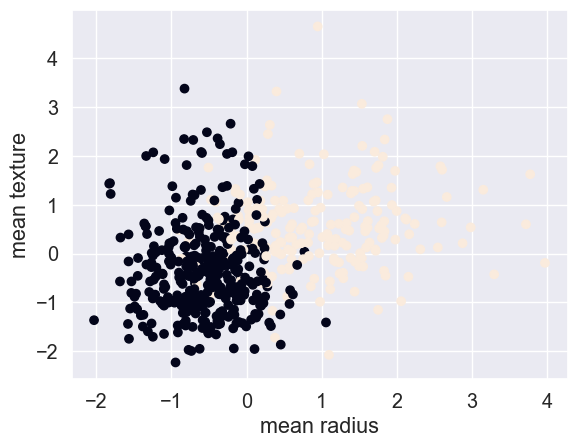

In [94]:
#plot of the dataset
plt.scatter(X_scaled.iloc[:, 0], X_scaled.iloc[:,1], c=y)
plt.xlabel('mean radius')
plt.ylabel('mean texture')
plt.show()

In [95]:
#split the dataset and train it
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=12)
model = Perceptron()
model.fit(X_train, y_train, gamma=0.001, max_iter=1000)

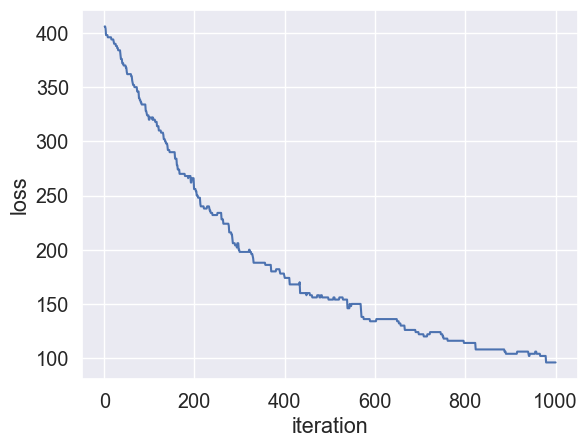

In [96]:
#plot of the loss function
plt.plot(model.loss_history)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

In [97]:
#calculate the training and testing accuracy
y_pred = model.prediction(X_train, model.weights)
print(f'Perceptron, training accuracy score = {accuracy_score(y_train, y_pred)}')

y_pred_test = model.prediction(X_test, model.weights)
print(f'Perceptron, test accuracy score = {accuracy_score(y_test, y_pred_test)}')

Perceptron, training accuracy score = 0.8873239436619719
Perceptron, test accuracy score = 0.8671328671328671


The training and testing accuracy were 0.83 which is not the best. 

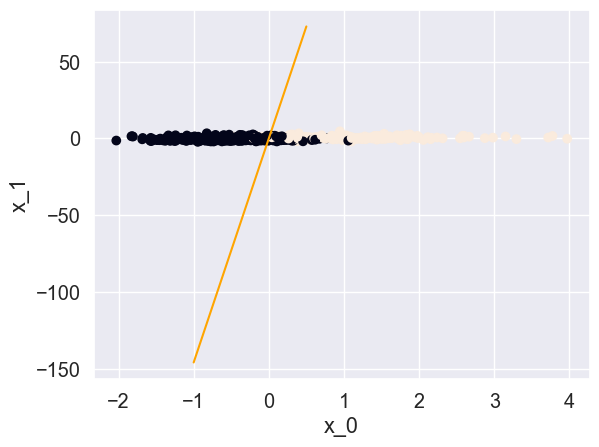

In [98]:
#plot the results
plt.scatter(X_scaled.iloc[:, 0], X_scaled.iloc[:,1], c=y)

domain = np.arange(-1., 1.0, 0.5)
w = model.weights
line = [-(w[1:2]*x)/w[0] for x in domain]

plt.plot(domain, line, label='separetor', color = 'orange')
plt.xlabel('x_0')
plt.ylabel('x_1')
plt.show()

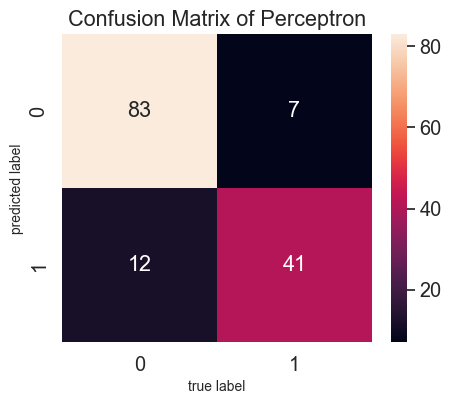

In [99]:
#confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_test)

matrix_df = pd.DataFrame(confusion_matrix)

plt.figure(figsize=(5,4))
ax=plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df, annot=True, fmt='g', ax=ax)
ax.set_title('Confusion Matrix of Perceptron')
ax.set_xlabel('true label', fontsize=10)
ax.set_ylabel('predicted label', fontsize=10)
plt.show()

There were 22 misclassified data which is not the best results. 